<a href="https://colab.research.google.com/github/Char1ieDevos/Bank-Management-System/blob/main/Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

#basename just extracts the file endpoint from a URL such as thinkstats.py
#import urlretrieve function from url library and at the request module
#urlretrive has first parameter url as the actual link, then the file you want to extract




Downloaded thinkstats.py


In [4]:
try:
    import empiricaldist
except ImportError:
    %pip install empiricaldist

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.9.0-py3-none-any.whl size=14297 sha256=0fa1816de6d0c508ad23f591a7ddbe89b4957eacef26b8064e51f94c5105a66b
  Stored in directory: /root/.cache/pip/wheels/26/56/da/ea90b6b66dc5e72379a64e2819815066873f00c1350126e876
Successfully built empiricaldist


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from thinkstats import decorate

Distributions are the fundamental ideas in statistics. Frequency tables are one where a dataset has values that correlate to a variable and the count being the number or frequency of that variable. This comes from the National Survey of Family Growth and **allendowney documentation**

In [6]:
from empiricaldist import FreqTab

In [7]:
t = [1.0, 2.0, 2.0, 3.0, 5.0]


In [52]:
ftab = FreqTab.from_seq(t)
ftab



#FreqTab is a module that contains from_seq, which helps to create a frequency table by wrapping a simple list type

NameError: name 'ft' is not defined

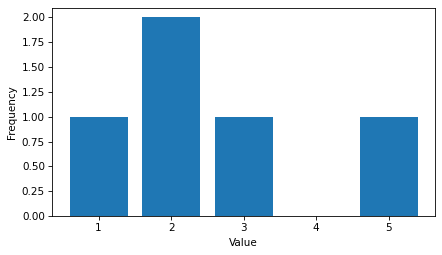

In [9]:
ftab.bar()
decorate(xlabel="Value", ylabel="Frequency")

#decorate() does the heavy lifting unlike plt labels, so a whole block of plt can be done often in one line of code!





In [12]:
ftab(2.0)

#calling 2.0 from the freqtab object just tells us the data type
np.int64(2)

np.int64(2)

In [53]:
ftab(4.0)

0

In [54]:
ftab.qs

#note that qs an fs measure differing properties of FreqTab, one is qs for unique values of the x-axis, while fs is the frequencies of those categoricals

array([1., 2., 3., 5.])

In [15]:
ftab.fs

array([1, 2, 1, 1])

In [16]:
for x, freq in ftab.items():
    print(x, freq)

    #items() is the standard for iterating values in an array or even just a list. The for loop accepts two arguments

1.0 1
2.0 2
3.0 1
5.0 1


In [59]:
import statadict
dir(statadict)


['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'parse_stata_dict']

In [61]:
try:
    import statadict
except ImportError:
    %pip install statadict

from statadict import normalize

pmf = normalize({1: 2, 2: 3, 3: 5})

#NOTE: normalize() doesn't seem to be in the repo since even %pip install oesn't work, so just ignore this function


ImportError: cannot import name 'normalize' from 'statadict' (/usr/local/lib/python3.12/dist-packages/statadict/__init__.py)

In [18]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

Downloaded nsfg.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [62]:
from nsfg import read_fem_preg

preg = read_fem_preg()

#nsfg or the National Survey of Family Growth is both a package-loader and also a real project of datasets from the CDC division. We use preg as a pointer

In [63]:
live = preg.query("outcome == 1")

#calls rows where pregnancy outcome column equals 1 as live births


In [21]:
ftab_lb = FreqTab.from_seq(live["birthwgt_lb"], name="birthwgt_lb")

#from_seq helps by converting a Pandas Series into a FreqTab object type and uses the queried live var to further list those single births by birthweight.

In [22]:
ftab_lb.idxmax()

#NOTE: both mode() and idxmax() provide identical values, but idxmax gives the inex with the highest frequency

np.float64(7.0)

In [23]:
ftab_lb.mode()

np.float64(7.0)

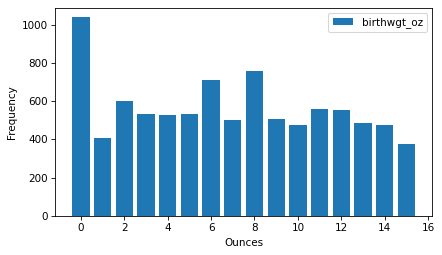

In [24]:
ftab_oz = FreqTab.from_seq(live["birthwgt_oz"], name="birthwgt_oz")
ftab_oz.bar()
decorate(xlabel="Ounces", ylabel="Frequency")

In [25]:
ftab_age = FreqTab.from_seq(live["agepreg"], name="agepreg")

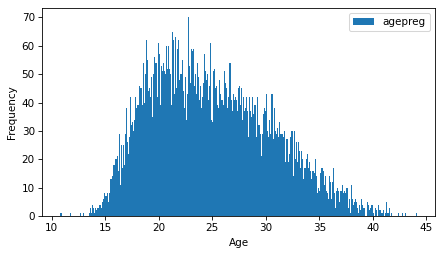

In [26]:
ftab_age.bar(width=0.1)
decorate(xlabel="Age", ylabel="Frequency")

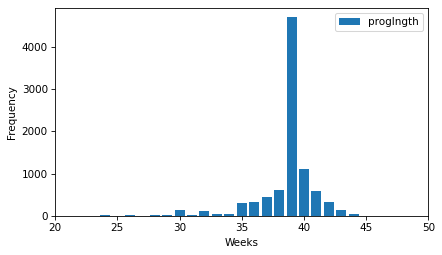

In [28]:
ftab_length = FreqTab.from_seq(live["prglngth"], name="proglngth")
ftab_length.bar()
decorate(xlabel="Weeks", ylabel="Frequency", xlim=[20, 50])

In [29]:
def smallest(ftab, n=10):
  return ftab[:n]

In [30]:
smallest(ftab_length)

,proglngth
prglngth,
0,1
4,1
9,1
13,1
17,2
18,1
19,1
20,1
21,2


In [32]:
def largest(ftab, n=10):
  return ftab[-n:]

In [33]:
largest(ftab_length)

,proglngth
prglngth,
40,1116
41,587
42,328
43,148
44,46
45,10
46,1
47,1
48,7


In [34]:
firsts = live.query("birthord == 1")
others = live.query("birthord != 1")

In [36]:
ftab_first = FreqTab.from_seq(firsts["prglngth"], name="firsts")
ftab_other = FreqTab.from_seq(others["prglngth"], name="others")

In [35]:
def two_bar_plots(ftab1, ftab2, width=0.45):
    ftab1.bar(align="edge", width=-width)
    ftab2.bar(align="edge", width=width, alpha=0.5)

    #just uses two Freqtab objects together with

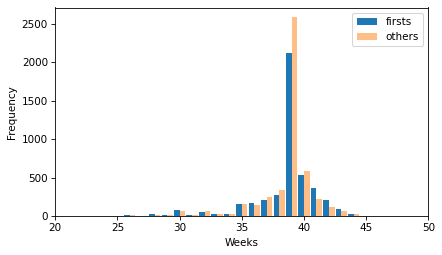

In [37]:
two_bar_plots(ftab_first, ftab_other)
decorate(xlabel="Weeks", ylabel="Frequency", xlim=[20, 50])

In [38]:
firsts["prglngth"].count(), others["prglngth"].count()

(np.int64(4413), np.int64(4735))

In [39]:
(np.int64(4413), np.int64(4735))

(np.int64(4413), np.int64(4735))

In [40]:
first_mean = firsts["prglngth"].mean()
other_mean = others["prglngth"].mean()
first_mean, other_mean

(np.float64(38.60095173351461), np.float64(38.52291446673706))

In [41]:
diff = first_mean - other_mean
diff, diff * 7 * 24

(np.float64(0.07803726677754952), np.float64(13.11026081862832))

In [42]:
diff / live["prglngth"].mean() * 100

np.float64(0.20237586646738304)

In [43]:
diff / live["prglngth"].std()

np.float64(0.028877623375210333)

In [44]:
group1, group2 = firsts["prglngth"], others["prglngth"]

In [45]:
v1, v2 = group1.var(), group2.var()

In [46]:
n1, n2 = group1.count(), group2.count()
pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

In [47]:
np.sqrt(pooled_var)

np.float64(2.702210814495382)

In [48]:
firsts["prglngth"].std(), others["prglngth"].std()

(2.7919014146686947, 2.615852350439255)

In [49]:
def cohen_effect_size(group1, group2):
    diff = group1.mean() - group2.mean()

    v1, v2 = group1.var(), group2.var()
    n1, n2 = group1.count(), group2.count()
    pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

    return diff / np.sqrt(pooled_var)

In [50]:
cohen_effect_size(firsts["prglngth"], others["prglngth"])

np.float64(0.028879044654449883)

In [ ]:
#pooled standard deviation is from the averaging from two or more groups to compute common deviation

#Cohen's effect size quantifies teh difference in the means of two groups.

#